## Data Analysis on ERCOT Electricity Data

In [67]:
# import libraries
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

### 1. Load Dataframe

In [71]:
# Load dataframe
ercot_df = pd.read_csv("clean_data/ERCOT_Electricity_Data.csv")

# Keep only the desired columns
desired_cols = ['Date', 'Hour_Ending', 'Price_Hub_Avg', 'Load_Total', 'WGen_System', 'SGen_System']
df = ercot_df[desired_cols]

# Convert date into a datetime object
df.loc[:, 'Date'] = pd.to_datetime(df['Date']).dt.date

# Preview dataframe
df.head()

,Date,Hour_Ending,Price_Hub_Avg,Load_Total,WGen_System,SGen_System
0,2024-11-20,1,17.70,40159.32,17019.42,0.51
1,2024-11-20,2,15.81,39105.78,17064.82,0.57
2,2024-11-20,3,15.58,38455.86,16660.08,0.53
3,2024-11-20,4,16.34,38270.82,15503.39,0.44
4,2024-11-20,5,19.90,39226.01,15728.04,0.46


#### Variable Descriptions
**Date:** ranges from the past 30 days (yyyy-mm-dd)

**Hour_Ending:** ranges from 1.0 (1am) to 12.0 (12am)

**Price_Hub_Avg:** average electrical bus price across ERCOT system

**Load_Total:** total electricity load (mW) across ERCOT system

**WGen_System:** total wind generation (mW) across ERCOT system

**SGen_System:** total solar generation (mW) across ERCOT system

### 2. Basic Descriptive Statistics

In [73]:
df.describe()

,Hour_Ending,Price_Hub_Avg,Load_Total,WGen_System,SGen_System
count,768.000000,744.000000,744.000000,744.000000,744.000000
mean,12.281250,26.129140,47503.175067,12394.227151,4434.087917
std,8.180752,13.172189,3706.574522,7156.227569,6336.753884
min,0.000000,1.710000,38270.820000,459.900000,0.250000
25%,6.000000,17.812500,44833.147500,6425.700000,0.720000
50%,12.000000,23.850000,47701.720000,10515.965000,1.455000
75%,18.000000,31.935000,50062.977500,19617.070000,8967.135000
max,48.000000,98.230000,60445.120000,26396.880000,20050.790000


##### Bivariate Analysis: Correlation between Time of Day vs. Electricity Price

In [74]:
# Calculate the avg. price by hour
hourly_price = df.groupby('Hour_Ending')['Price_Hub_Avg'].mean().reset_index()

# Get the hour and average price as separate lists
hours = hourly_price['Hour_Ending']
avg_prices = hourly_price['Price_Hub_Avg']

# Calculate Pearson correlation
corr, p_value = pearsonr(hours, avg_prices)

print(f'Correlation between Hour of Day and Average Price: {corr:.3f}')
print(f'p-value: {p_value:.3f}')

Correlation between Hour of Day and Average Price: -0.124
p-value: 0.400


### 2. Visualizing the Data

##### a. Average Grid Load vs. Time of Day

In [ ]:
# Group by hour and calculate the average load
avg_load = df.groupby('Hour_Ending')['Load_Total'].mean().reset_index()

# Plot the average electricity load against hours
plt.figure(figsize=(12, 6))
plt.plot(avg_load['Hour_Ending'], avg_load['Load_Total'], marker='o')
plt.title('Average Electricity Load by Time of Day')
plt.xlabel('Time (hours)')
plt.ylabel('Average Electricity Load (MW)')
plt.grid()
plt.show()


##### b. Average Electricity Price vs. Time of Day

In [ ]:
# Group by hour and calculate the average price
avg_price = df.groupby('Hour_Ending')['Price_Hub_Avg'].mean().reset_index()

# Plot the average electricity load against hours
plt.figure(figsize=(12, 6))
plt.plot(avg_price['Hour_Ending'], avg_price['Price_Hub_Avg'], color='red', marker='o')
plt.title('Average Electricity Price by Time of Day')
plt.xlabel('Time (hours)')
plt.ylabel('Average Electricity Price ($)')
plt.grid()
plt.show()

##### c. Comparing the Average Grid Load to Electricity Price over Time

In [ ]:
# Group data by hour and calculate the average
average_data = df.groupby('Hour_Ending').agg({'Load_Total': 'mean', 'Price_Hub_Avg': 'mean'}).reset_index()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average electricity load
ax1.plot(average_data['Hour_Ending'], average_data['Load_Total'], color='blue', marker='o', label='Average Load')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Average Electricity Load (MW)')

# Create a second y-axis for average price
ax2 = ax1.twinx()  
ax2.plot(average_data['Hour_Ending'], average_data['Price_Hub_Avg'], color='red', marker='s', label='Average Price')
ax2.set_ylabel('Average Electricity Price ($)')

# Add title and grid
plt.title('Average Daily Electricity Load and Price')
ax1.grid()

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

##### d. Comparing the Average Wind Generation to Solar Generation Over Time

In [ ]:
# Group data by hour and calculate the average
average_data = df.groupby('Hour_Ending').agg({'WGen_System': 'mean', 'SGen_System': 'mean'}).reset_index()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average electricity load
ax1.plot(average_data['Hour_Ending'], average_data['WGen_System'], color='green', marker='o', label='Average Wind Generation')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Average Wind Power Generation (MW)')

# Create a second y-axis for average price
ax2 = ax1.twinx()
ax2.plot(average_data['Hour_Ending'], average_data['SGen_System'], color='orange', marker='s', label='Average Solar Generation')
ax2.set_ylabel('Average Solar Power Generation (MW)')

# Add title and grid
plt.title('Average Daily Wind and Solar Power Generation')
ax1.grid()

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

##### e. Compare Wind Power Generation over 30 Days

In [78]:
# First combine date and hour into a datetime object
df['Date_Time'] = df.apply(lambda x: pd.Timestamp(year=x['Date'].year, 
                                                         month=x['Date'].month, 
                                                         day=x['Date'].day, 
                                                         hour=x['Hour_Ending']), axis=1)
df.head()

ValueError: hour must be in 0..23

C:\Users\kater\AppData\Local\Temp\ipykernel_5876\221767340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WGen_System_Smooth'] = df['WGen_System'].ewm(span=10, adjust=False).mean()


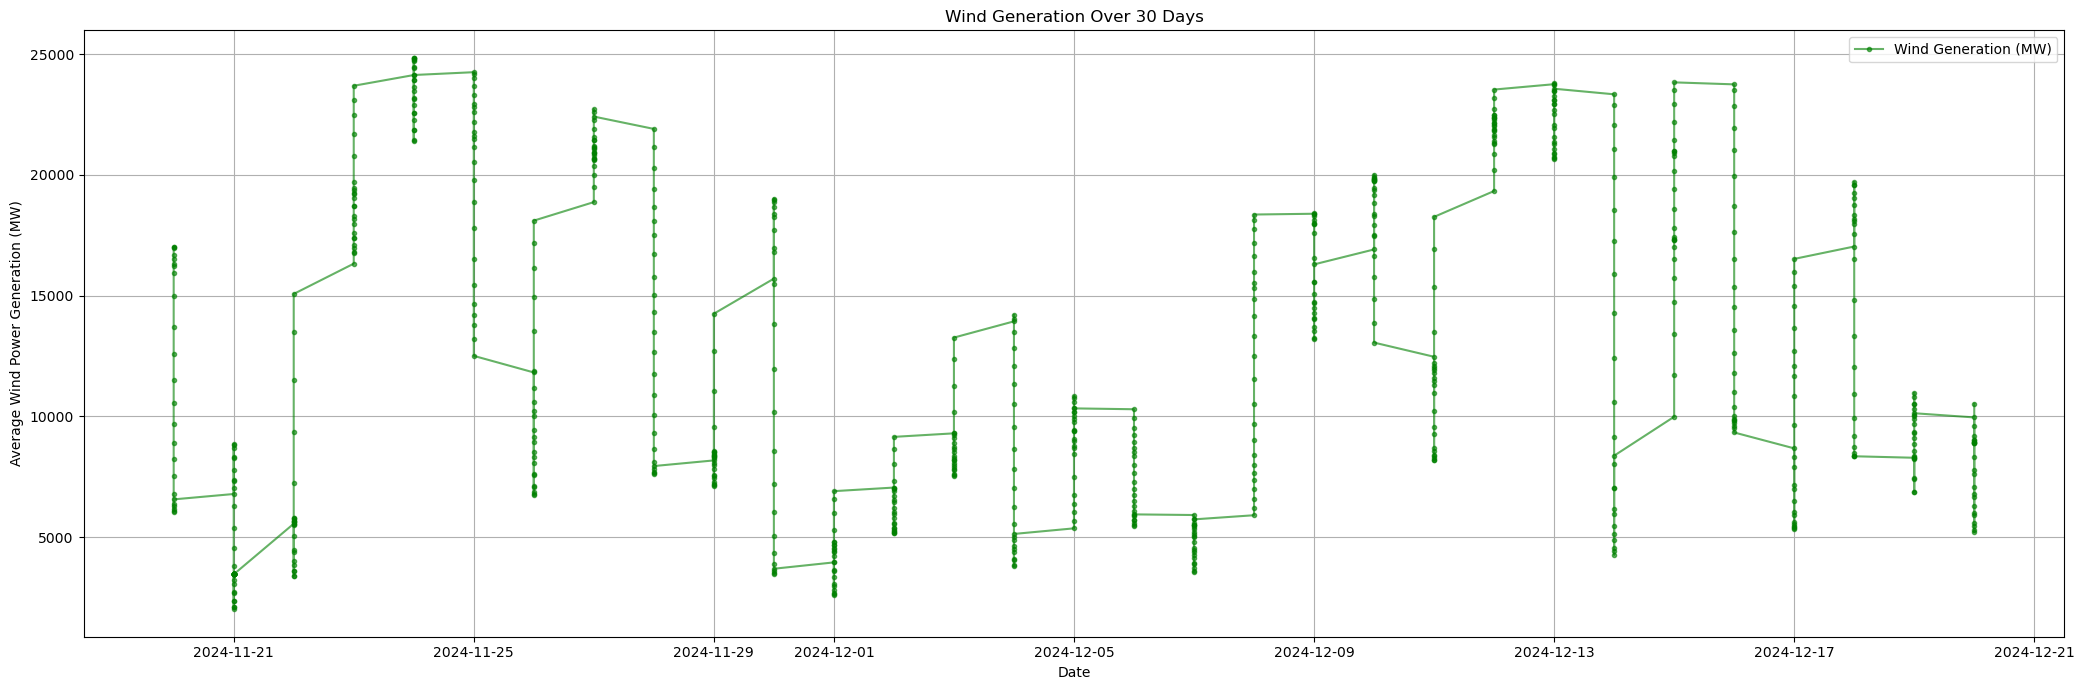

In [ ]:
# Attempt to smooth data via exponential moving avg
df['WGen_System_Smooth'] = df['WGen_System'].ewm(span=10, adjust=False).mean()

# Create plot
plt.figure(figsize=(21, 7))

# Plot average wind generation
plt.plot(df['Date'], df['WGen_System_Smooth'], color='green', marker='.', label='Wind Generation (MW)', alpha=0.6)
#plt.plot(df['Date_Time'], df['WGen_System'], color='blue', marker='o', label='Wind Generation (units)', alpha=0.6)

# Add title and labels
plt.title('Wind Generation Over 30 Days')
plt.xlabel('Date')
plt.ylabel('Average Wind Power Generation (MW)')
plt.xticks(rotation=0)
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

##### f. Compare Solar Power Generation over 30 Days

In [ ]:
# Attempt to smooth data via exponential moving avg
df['SGen_System_Smooth'] = df.loc[:, 'SGen_System'].ewm(span=2, adjust=False).mean()

# Create plot
plt.figure(figsize=(21, 7))

# Plot average solar power generation
plt.plot(df['Date'], df['SGen_System_Smooth'], color='orange', marker='.', label='Solar Generation (MW)', alpha=0.6)

# Add title and labels
plt.title('Solar Generation Over 30 Days')
plt.xlabel('Date')
plt.ylabel('Average Solar Power Generation (MW)')
plt.xticks(rotation=0) 
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

# NEWWWWW SECTION TESTING STUFF HERE

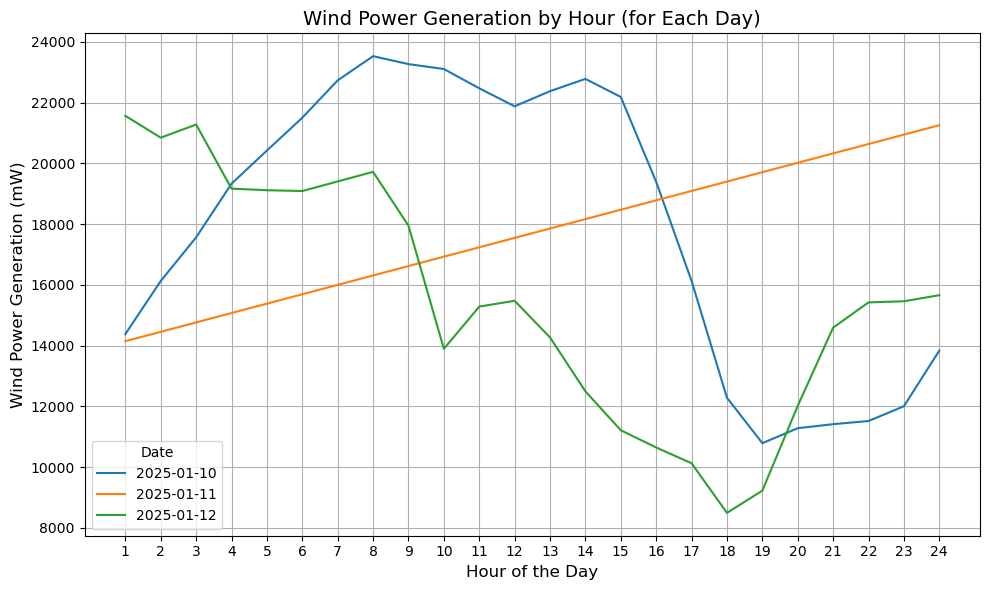

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

wind_df = pd.read_csv('wind_df.csv')

# Ensure 'Date' is a datetime object for proper grouping
wind_df['Date'] = pd.to_datetime(wind_df['Date'], errors='coerce')

# Group data by date
grouped = wind_df.groupby('Date')

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop through each group (each date) and plot
for date, group in grouped:
    plt.plot(group['Hour'], group['Wind_SystemWide'], label=date.date())  # date.date() for cleaner labels

# Add labels, title, and legend
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Wind Power Generation (mW)', fontsize=12)
plt.title('Wind Power Generation by Hour (for Each Day)', fontsize=14)
plt.xticks(range(1, 25), fontsize=10)  # Set x-axis ticks to represent hours
plt.legend(title='Date', fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

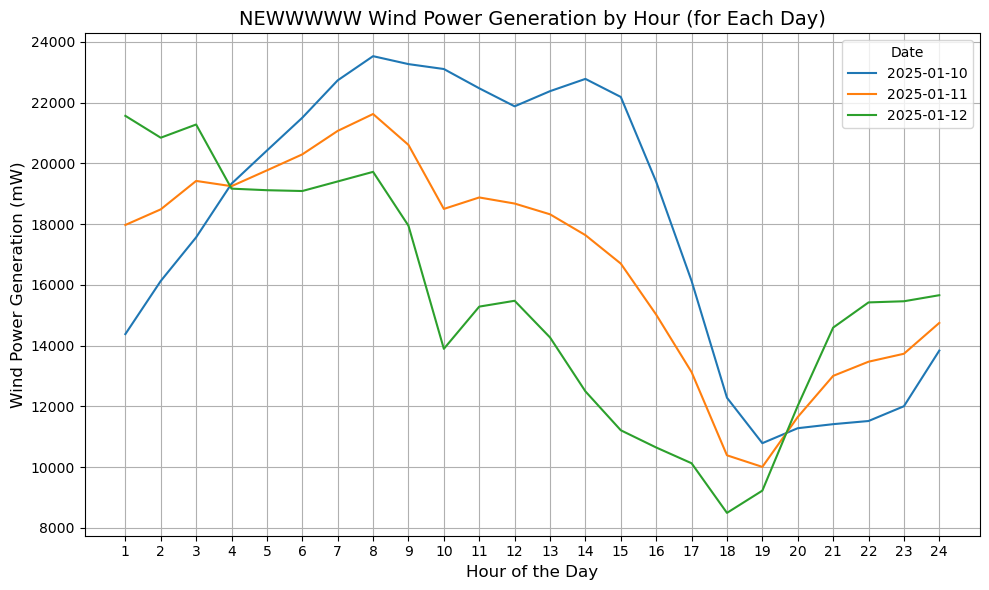

In [10]:
wind_df = pd.read_csv('wind_df_new_fill.csv')

# Ensure 'Date' is a datetime object for proper grouping
wind_df['Date'] = pd.to_datetime(wind_df['Date'], errors='coerce')

# Group data by date
grouped = wind_df.groupby('Date')

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop through each group (each date) and plot
for date, group in grouped:
    plt.plot(group['Hour'], group['Wind_SystemWide'], label=date.date())  # date.date() for cleaner labels

# Add labels, title, and legend
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Wind Power Generation (mW)', fontsize=12)
plt.title('NEWWWWW Wind Power Generation by Hour (for Each Day)', fontsize=14)
plt.xticks(range(1, 25), fontsize=10)  # Set x-axis ticks to represent hours
plt.legend(title='Date', fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

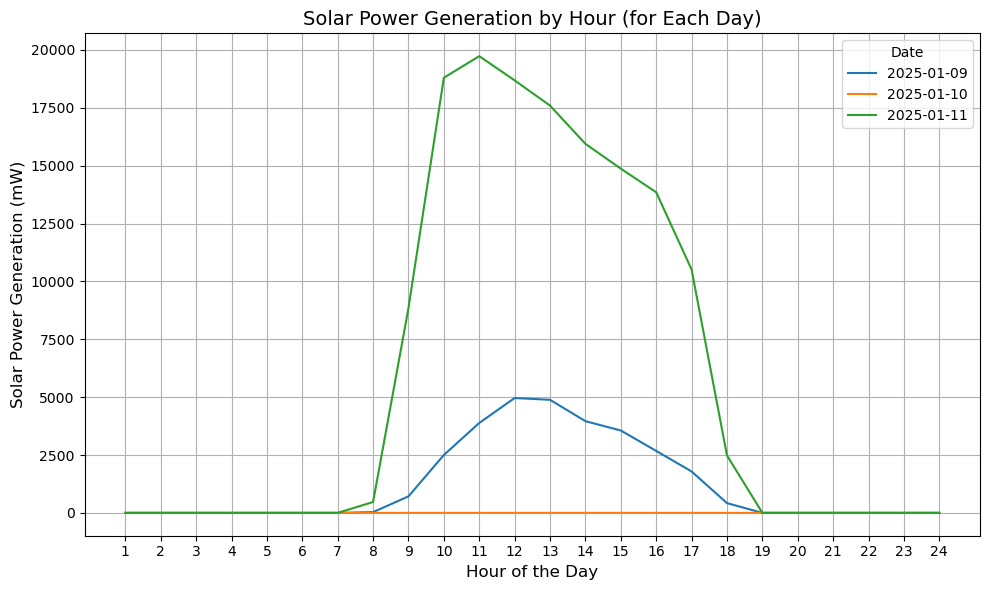

In [6]:
solar_df = pd.read_csv('solar_df.csv')

# Ensure 'Date' is a datetime object for proper grouping
solar_df['Date'] = pd.to_datetime(solar_df['Date'], errors='coerce')

# Group data by date
grouped = solar_df.groupby('Date')

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop through each group (each date) and plot
for date, group in grouped:
    plt.plot(group['Hour'], group['Solar_SystemWide'], label=date.date())  # date.date() for cleaner labels

# Add labels, title, and legend
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Solar Power Generation (mW)', fontsize=12)
plt.title('Solar Power Generation by Hour (for Each Day)', fontsize=14)
plt.xticks(range(1, 25), fontsize=10)  # Set x-axis ticks to represent hours
plt.legend(title='Date', fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

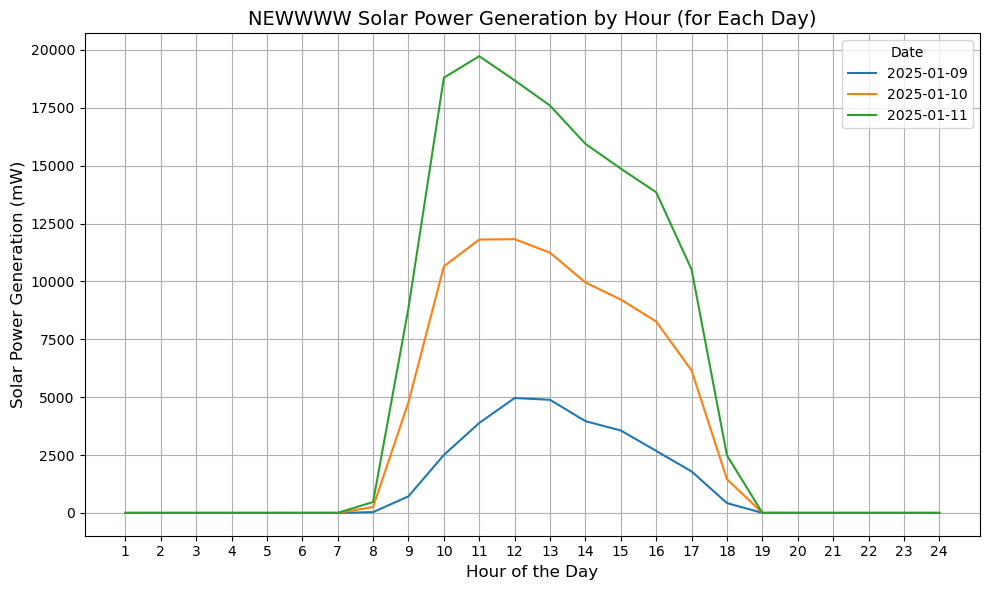

In [11]:
solar_df = pd.read_csv('solar_df_new_fill.csv')

# Ensure 'Date' is a datetime object for proper grouping
solar_df['Date'] = pd.to_datetime(solar_df['Date'], errors='coerce')

# Group data by date
grouped = solar_df.groupby('Date')

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop through each group (each date) and plot
for date, group in grouped:
    plt.plot(group['Hour'], group['Solar_SystemWide'], label=date.date())  # date.date() for cleaner labels

# Add labels, title, and legend
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Solar Power Generation (mW)', fontsize=12)
plt.title('NEWWWW Solar Power Generation by Hour (for Each Day)', fontsize=14)
plt.xticks(range(1, 25), fontsize=10)  # Set x-axis ticks to represent hours
plt.legend(title='Date', fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

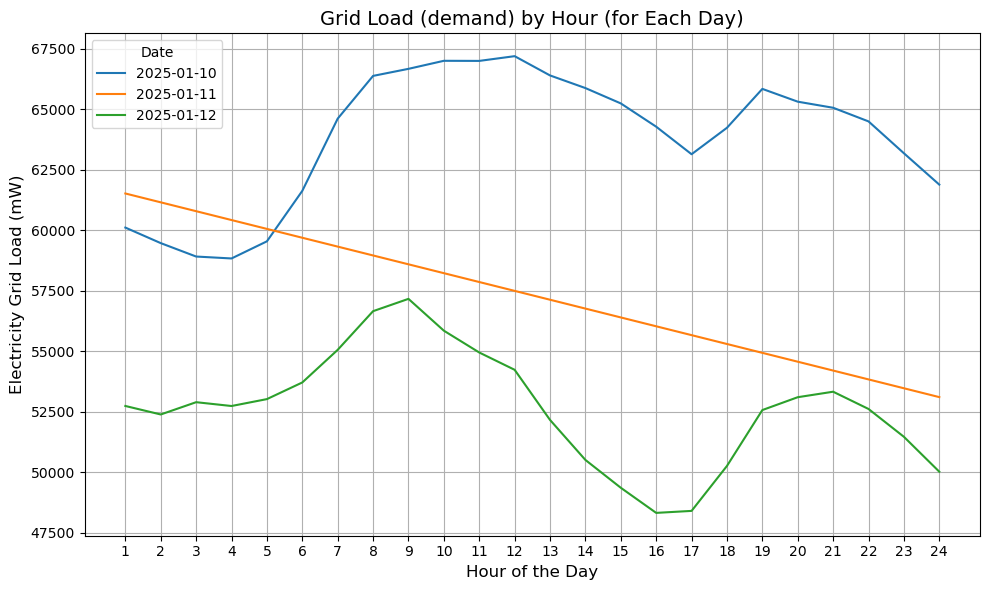

In [8]:
load_df = pd.read_csv('load_df.csv')

# Ensure 'Date' is a datetime object for proper grouping
load_df['Date'] = pd.to_datetime(load_df['Date'], errors='coerce')

# Group data by date
grouped = load_df.groupby('Date')

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop through each group (each date) and plot
for date, group in grouped:
    plt.plot(group['Hour'], group['Load_Total'], label=date.date())  # date.date() for cleaner labels

# Add labels, title, and legend
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Electricity Grid Load (mW)', fontsize=12)
plt.title('Grid Load (demand) by Hour (for Each Day)', fontsize=14)
plt.xticks(range(1, 25), fontsize=10)  # Set x-axis ticks to represent hours
plt.legend(title='Date', fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

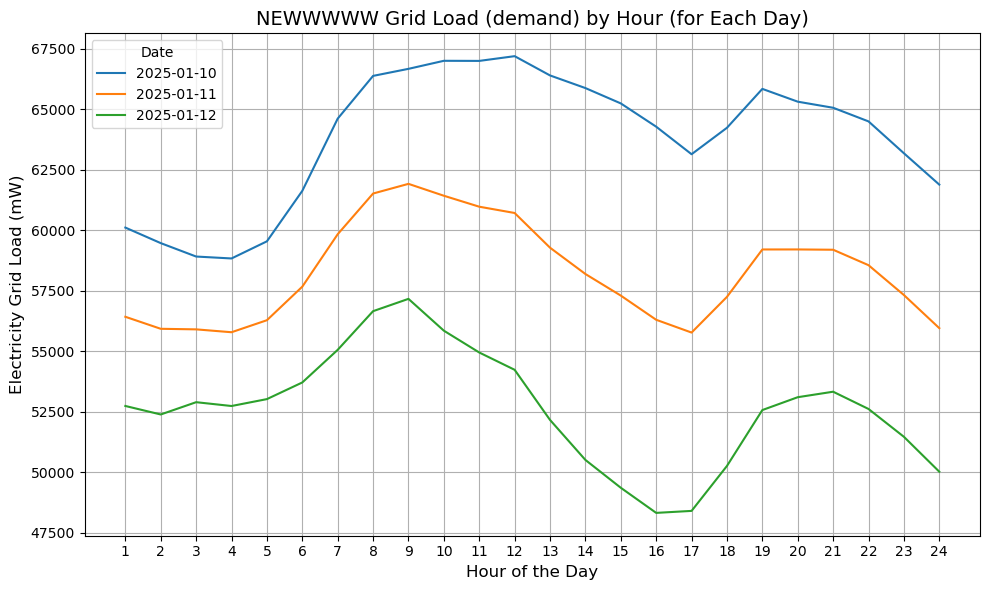

In [13]:
load_df = pd.read_csv('load_df_new_fill.csv')

# Ensure 'Date' is a datetime object for proper grouping
load_df['Date'] = pd.to_datetime(load_df['Date'], errors='coerce')

# Group data by date
grouped = load_df.groupby('Date')

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop through each group (each date) and plot
for date, group in grouped:
    plt.plot(group['Hour'], group['Load_Total'], label=date.date())  # date.date() for cleaner labels

# Add labels, title, and legend
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Electricity Grid Load (mW)', fontsize=12)
plt.title('NEWWWWW Grid Load (demand) by Hour (for Each Day)', fontsize=14)
plt.xticks(range(1, 25), fontsize=10)  # Set x-axis ticks to represent hours
plt.legend(title='Date', fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

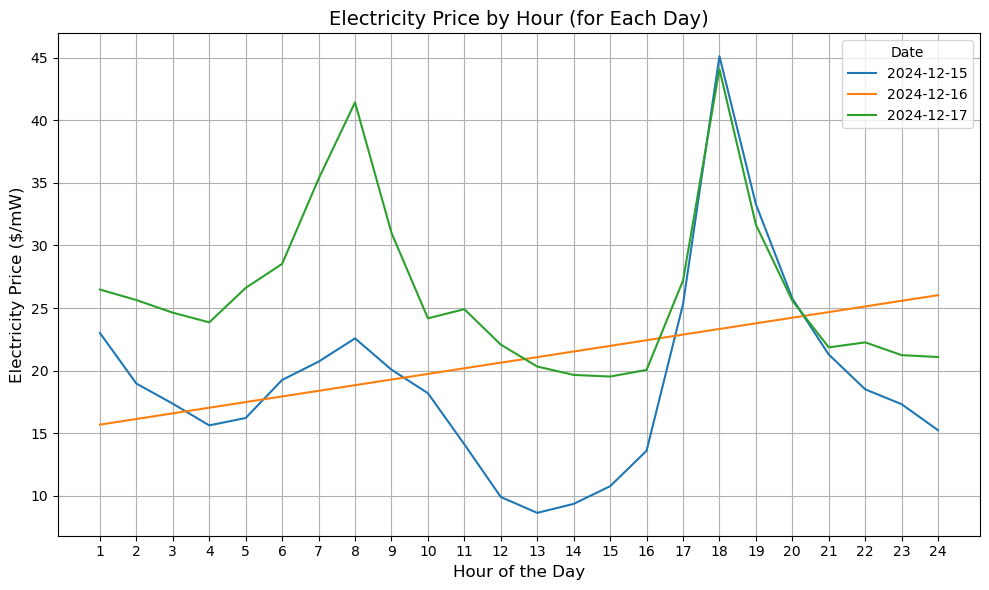

In [9]:
price_df = pd.read_csv('price_df.csv')

# Ensure 'Date' is a datetime object for proper grouping
price_df['Date'] = pd.to_datetime(price_df['Date'], errors='coerce')

# Group data by date
grouped = price_df.groupby('Date')

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop through each group (each date) and plot
for date, group in grouped:
    plt.plot(group['Hour'], group['Price_Bus_Avg'], label=date.date())  # date.date() for cleaner labels

# Add labels, title, and legend
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Electricity Price ($/mW)', fontsize=12)
plt.title('Electricity Price by Hour (for Each Day)', fontsize=14)
plt.xticks(range(1, 25), fontsize=10)  # Set x-axis ticks to represent hours
plt.legend(title='Date', fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

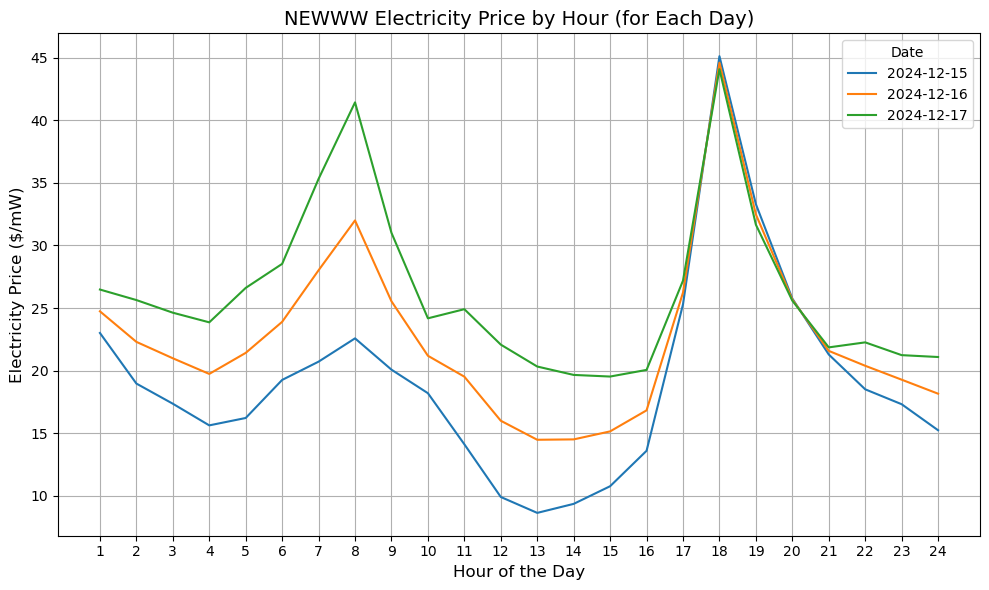

In [12]:
price_df = pd.read_csv('price_df_new_fill.csv')

# Ensure 'Date' is a datetime object for proper grouping
price_df['Date'] = pd.to_datetime(price_df['Date'], errors='coerce')

# Group data by date
grouped = price_df.groupby('Date')

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop through each group (each date) and plot
for date, group in grouped:
    plt.plot(group['Hour'], group['Price_Bus_Avg'], label=date.date())  # date.date() for cleaner labels

# Add labels, title, and legend
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Electricity Price ($/mW)', fontsize=12)
plt.title('NEWWW Electricity Price by Hour (for Each Day)', fontsize=14)
plt.xticks(range(1, 25), fontsize=10)  # Set x-axis ticks to represent hours
plt.legend(title='Date', fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()